In [1]:
#Basic imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv",header=None,names=["text","emotion"],sep=";")
test=pd.read_csv("test.csv",header=None,names=["text","emotion"],sep=";")

In [3]:
train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


C:\Users\Ramcharan\anaconda3\envs\sentiment-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='emotion', ylabel='count'>

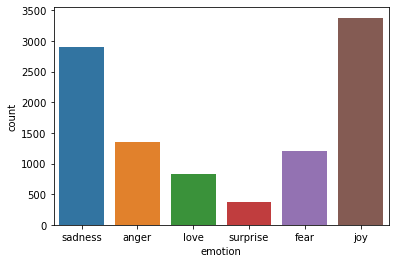

In [4]:
#Count plot of train emotions 
sns.countplot(train.emotion)

C:\Users\Ramcharan\anaconda3\envs\sentiment-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='emotion', ylabel='count'>

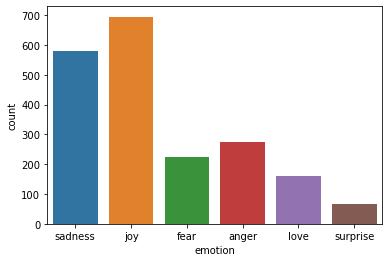

In [5]:
#Count plot of test emotions 
sns.countplot(test.emotion)

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
Lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ramcharan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ramcharan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [7]:
corpus_train=[]
for i in range(len(train.text)):
    word=re.sub("[^a-zA-Z]"," ",train.text[i])
    word=word.lower()
    word=word.split()
    word=[Lemmatizer.lemmatize(words) for words in word if words not in set(stopwords.words("english"))]
    word=" ".join(word)
    corpus_train.append(word)

In [8]:
corpus_test=[]
for i in range(len(test.text)):
    word=re.sub("[^a-zA-Z]"," ",test.text[i])
    word=word.lower()
    word=word.split()
    word=[Lemmatizer.lemmatize(words) for words in word if words not in set(stopwords.words("english"))]
    word=" ".join(word)
    corpus_test.append(word)

In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
encode=LabelEncoder()

Using TensorFlow backend.


In [12]:
label_train=encode.fit_transform(train.emotion.astype(str))
label_test=encode.transform(test.emotion)

In [13]:
Y_test=to_categorical(label_test)
Y_train=to_categorical(label_train)

In [14]:
encode.classes_

array(['anger', 'fear', 'joy', 'love', 'nan', 'sadness', 'surprise'],
      dtype=object)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [16]:
max_no = 50000
seq_len = 100
embed_dim = 100
tokenizer = Tokenizer(num_words=max_no, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train.text.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11999 unique tokens.


In [17]:
X = tokenizer.texts_to_sequences(train.text.values)
X_train = pad_sequences(X, maxlen=seq_len)

In [18]:
X=tokenizer.texts_to_sequences(test.text.values)
X_test = pad_sequences(X, maxlen=seq_len)

In [20]:
model = Sequential()
model.add(Embedding(max_no, embed_dim, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(100,activation="relu"))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 128

model.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test,Y_test),verbose=1)

C:\Users\Ramcharan\anaconda3\envs\sentiment-analysis\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10053 samples, validate on 2000 samples
Epoch 1/5
10053/10053 [==============================] - 34s 3ms/step - loss: 1.6347 - accuracy: 0.3265 - val_loss: 1.5504 - val_accuracy: 0.3100
Epoch 2/5
10053/10053 [==============================] - 34s 3ms/step - loss: 1.4093 - accuracy: 0.4678 - val_loss: 1.1378 - val_accuracy: 0.5855
Epoch 3/5
10053/10053 [==============================] - 33s 3ms/step - loss: 0.8100 - accuracy: 0.7059 - val_loss: 0.7319 - val_accuracy: 0.7395
Epoch 4/5
10053/10053 [==============================] - 34s 3ms/step - loss: 0.4351 - accuracy: 0.8562 - val_loss: 0.5091 - val_accuracy: 0.8245
Epoch 5/5
10053/10053 [==============================] - 34s 3ms/step - loss: 0.2271 - accuracy: 0.9304 - val_loss: 0.4267 - val_accuracy: 0.8670


In [21]:
model.fit(X_train,Y_train,epochs=10,batch_size=batch_size,validation_data=(X_test,Y_test),verbose=1,initial_epoch=5)

Train on 10053 samples, validate on 2000 samples
Epoch 6/10
10053/10053 [==============================] - 32s 3ms/step - loss: 0.1530 - accuracy: 0.9525 - val_loss: 0.4304 - val_accuracy: 0.8640
Epoch 7/10
10053/10053 [==============================] - 33s 3ms/step - loss: 0.1145 - accuracy: 0.9667 - val_loss: 0.4284 - val_accuracy: 0.8655
Epoch 8/10
10053/10053 [==============================] - 38s 4ms/step - loss: 0.0911 - accuracy: 0.9717 - val_loss: 0.4390 - val_accuracy: 0.8650
Epoch 9/10
10053/10053 [==============================] - 42s 4ms/step - loss: 0.0733 - accuracy: 0.9772 - val_loss: 0.4335 - val_accuracy: 0.8655
Epoch 10/10
10053/10053 [==============================] - 36s 4ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.4388 - val_accuracy: 0.8735


In [22]:
accuracy=model.history.history["accuracy"]
loss=model.history.history["loss"]
val_loss=model.history.history["val_loss"]
val_accuracy=model.history.history["val_accuracy"]

In [23]:
len(accuracy)

5

C:\Users\Ramcharan\anaconda3\envs\sentiment-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


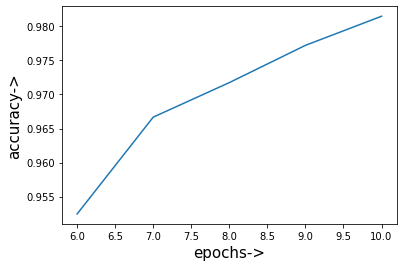

C:\Users\Ramcharan\anaconda3\envs\sentiment-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


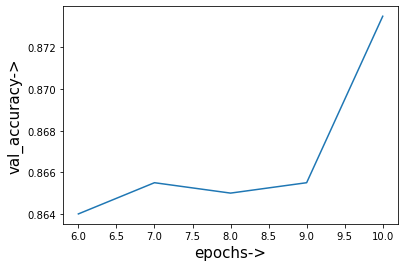

In [24]:
sns.lineplot(range(6,11),accuracy) #plotting of accuracy
plt.xlabel("epochs->",fontsize=15)
plt.ylabel("accuracy->",fontsize=15)
plt.show()
sns.lineplot(range(6,11),val_accuracy) #plotting of val_accuracy
plt.xlabel("epochs->",fontsize=15)
plt.ylabel("val_accuracy->",fontsize=15)
plt.show()

C:\Users\Ramcharan\anaconda3\envs\sentiment-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


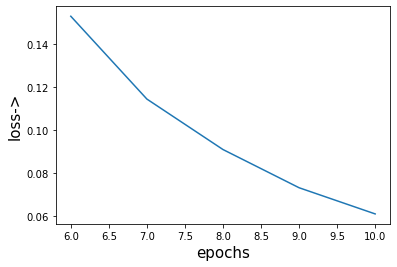

C:\Users\Ramcharan\anaconda3\envs\sentiment-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


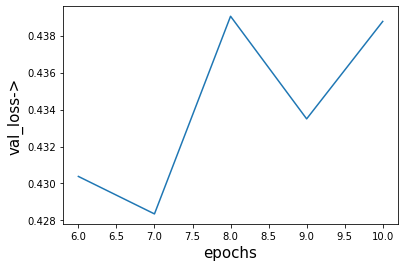

In [25]:
sns.lineplot(range(6,11),loss) #plotting of loss
plt.xlabel("epochs",fontsize=15)
plt.ylabel("loss->",fontsize=15)
plt.show()
sns.lineplot(range(6,11),val_loss)#plotting of val_loss
plt.xlabel("epochs",fontsize=15)
plt.ylabel("val_loss->",fontsize=15)
plt.show()

C:\Users\Ramcharan\anaconda3\envs\sentiment-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'loss->')

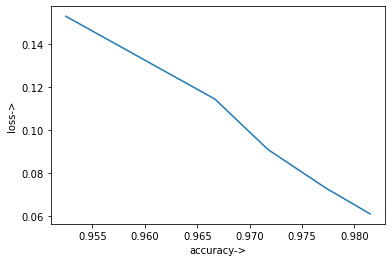

In [26]:
sns.lineplot(accuracy,loss)
plt.xlabel("accuracy->")
plt.ylabel("loss->")

In [27]:
pred=model.predict_classes(X_test)

<AxesSubplot:>

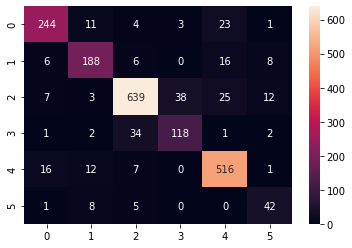

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(pred,label_test),annot=True,fmt="")

In [30]:
encode.classes_

array(['anger', 'fear', 'joy', 'love', 'nan', 'sadness', 'surprise'],
      dtype=object)

In [31]:
# it is better to store this dict
dict={'anger':0, 'fear':1, 'joy':2, 'love':3, 'sadness':4,'surprise':5}

In [32]:
len(pred)

2000

In [33]:
model.evaluate(X_test,Y_test)

2000/2000 [==============================] - 2s 1ms/step


[0.43876596266031265, 0.8734999895095825]

In [34]:
from sklearn.metrics import classification_report
print(classification_report(pred,label_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       286
           1       0.84      0.84      0.84       224
           2       0.92      0.88      0.90       724
           3       0.74      0.75      0.74       158
           5       0.89      0.93      0.91       552
           6       0.64      0.75      0.69        56

    accuracy                           0.87      2000
   macro avg       0.82      0.83      0.83      2000
weighted avg       0.88      0.87      0.87      2000

